## TP3 : Logistic regression

The purpose of this tutorial is to implement and use the Logistic Regression for binary classification. We will apply this
method to the problem of handwritten characters to learn how to
distinguish two numbers (here 5 and 6).


In [1]:
from pylab import *
from numpy import random as rd
#import numpy as np
#import matplotlib.pyplot as plt

from numpy import linalg as la

## 1. Logistic regression, IRLS algorithm.

### Preliminary question: the algorithm

#### Have a look at the function `regression_logistique.m` and locate the main steps of the algorithm you have been taught (see course).
You can comment the code in the cell below.

In [2]:
def regression_logistique(X,t,Nitermax=20,eps_conv=1e-3):
    '''Entrees :
    X = [ones(N_train,1) x_train];
    t = class_train 
    Nitermax = nombre maximale d'itérations (20 par défaut)
    eps_conv = critère de convergence sur norm(w-w_old)/norm(w) ; 
    eps_conv=1e-3 par défaut
    
    Sorties : 
    w : vecteur des coefficients de régression logistique
   Niter : nombre d'itérations utilisées effectivement
   
   Fonction de régression logistique pour la classification binaire.
   
   Utilisation :
       Nitermax = 50
       eps_conv = 1e-4
       [w,Niter] = regression_logistique(X,t,Nitermax,eps_conv)
    '''
    N_train = X.shape[0]

    #initialisation : 1 pas de l'algorithme IRLS
    w = np.zeros((X.shape[1],))
    w_old = w 
    y = 1/2*np.ones((N_train,))
    R = np.diag(y*(1-y))   # diag(y_n(1-y_n))
    z = X.dot(w_old)-la.inv(R).dot(y-t)
    w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z)
    # boucle appliquant l'algortihme de Newton-Raphson
    Niter = 1
    while ( (la.norm(w-w_old)/la.norm(w)>eps_conv) and (Niter<Nitermax) ):
        Niter = Niter+1
        y = 1/(1+np.exp(-X.dot(w)))
        R = np.diag(y*(1-y))  
        w_old = w 
        z = X.dot(w_old)-la.inv(R).dot(y-t) 
        w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z)
         
    return w, Niter


### Reading & preparing synthetic data

Load the training and test data sets `synth_train.txt`
and `synth_test.txt`. The targets t belong to {1,2} and the features  
x belong to R^2. 

We have 100 training samples and 200 test samples

* the 1st column contains the label of each sample, 
* columns 2 and 3 contain the coordinate of each point.

In [3]:
# Training set
synth_train = np.loadtxt('synth_train.txt') 
class_train = synth_train[:,0]
class_train_1 = np.where(synth_train[:,0]==1)[0]
class_train_2 = np.where(synth_train[:,0]==2)[0]
x_train = synth_train[:,1:]
N_train = np.size(x_train,axis=0)

# Test set
synth_test = np.loadtxt('synth_test.txt')
class_test = synth_test[:,0]
class_test_1 = np.where(synth_test[:,0]==1)[0]
class_test_2 = np.where(synth_test[:,0]==2)[0]
x_test = synth_test[:,1:]
N_test = np.size(x_test,axis=0)


### Preparing features for logistic regression (binary classification)
First, we prepare the feature matrix and the target vector associated to 
the training and test sets:


In [4]:
X = np.hstack((np.ones((N_train,1)),x_train))
t = 2-class_train   # 0 if class=2, 1 if class=1

X_test = np.hstack((np.ones((N_test,1)),x_test))
t_test = 2-class_test   # 0 if class=2, 1 if class=1

In [5]:
X.shape

(100, 3)

### Exercise 1 : the logistic function of decision

1. Use the function `regression_logistique.m` to estimate the logistic
regression vector `w`. *Indication : use `Nitermax = 50;
eps_conv=1e-3;`.*
2. Compute the decision function $f(x) = argmax_k P(C_k|x)$ on the test set
to get the classification results. Recall that $y_n=\sigma(w^T x)$ (logistic function)
and that *using vectors* you may directly write $y=\sigma(Xw)$, with the
column of ones in X.
3. Display the results by plotting the points from both the training set
and the test set.
4. Write the equation which defines the decision boundary.
5. Artificially add a few points to the training set far from the decision boundary to check the robustness of logistic regression to outliers. Check the behaviour of LDA for comparison in this case and comment. 


In [6]:
def sigmoid(x):
    return(1/(1+np.exp(-x)))

In [7]:
#Exercise 1
w, Niter = regression_logistique(X, t, Nitermax = 50)
y = sigmoid(X_test@w)
f_x = np.round(y)
#...

You can draw the decision boundary $w^Tx = 0$ by using: 


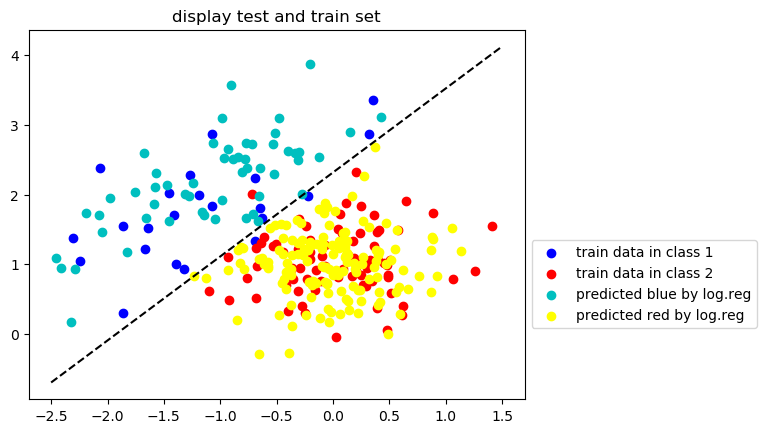

In [8]:
# First compute w... then: 
x1 = np.linspace(-2.5,1.5,10) 
x2 = (-w[0]-w[1]*x1)/w[2]

plt.title('display test and train set')
X_train_class1 =x_train[class_train_1]
X_train_class2 = x_train[class_train_2]

plt.scatter(X_train_class1[:,0],X_train_class1[:,1],color = 'b',label='train data in class 1')
plt.scatter(X_train_class2[:,0],X_train_class2[:,1],color = 'r',label='train data in class 2')

X_test_class1 =x_test[np.where(f_x==1)]
X_test_class2 = x_test[np.where(f_x==0)]

plt.scatter(X_test_class1[:,0],X_test_class1[:,1],color = 'c',label='predicted blue by log.reg')
plt.scatter(X_test_class2[:,0],X_test_class2[:,1],color = 'yellow',label = 'predicted red by log.reg')
plt.legend( bbox_to_anchor=(1, .45))
plt.plot(x1,x2,'k--')
# ...

In [9]:
#compute error on test set
err = np.mean(np.abs(f_x - t_test))
print("error on test set : " + str(err*100) + " %")

error on test set : 6.0 %


#### Now we add data that would represent measurement errors to test robustness of log.reg

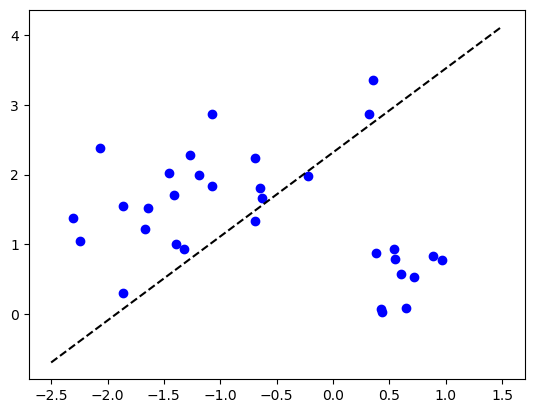

In [10]:
x1 = np.linspace(-2.5,1.5,10) 
x2 = (-w[0]-w[1]*x1)/w[2]
rd.seed(0)
error_meas_points = np.concatenate((np.ones((1,10)), np.random.rand(2,10))).T
plt.scatter(X_train_class1[:,0], X_train_class1[:,1],color = 'b', label='train data in class 1')

plt.scatter(error_meas_points[:,1], error_meas_points[:,2], color = 'b')
plt.plot(x1,x2,'k--')

In [11]:
#retrain log.reg with eroor measurement points
synth_train_err_meas = np.concatenate((synth_train,error_meas_points))

class_train_err_meas = synth_train_err_meas[:,0]
x_train_err_meas = synth_train_err_meas[:,1:]
N_train_err_meas = np.size(x_train_err_meas,axis=0)


X_err_meas = np.hstack((np.ones((N_train_err_meas,1)),x_train_err_meas))
train_err_meas = 2-class_train_err_meas   # 0 if class=2, 1 if class=1

w_err_meas, Niter = regression_logistique(X_err_meas, train_err_meas,Nitermax = 50)
y_err_meas = sigmoid(X_test@w_err_meas)
f_x_err_meas = np.round(y_err_meas)


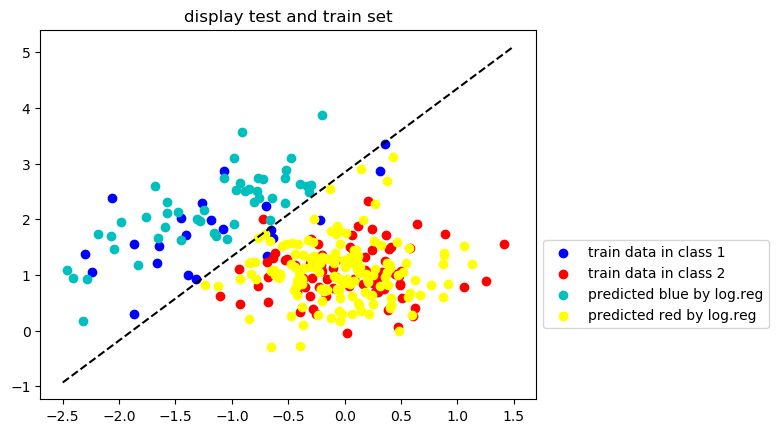

In [12]:
# First compute w... then: 
x1 = np.linspace(-2.5,1.5,10) 
x2 = (-w_err_meas[0]-w_err_meas[1]*x1)/w_err_meas[2]

plt.title('display test and train set')
X_train_class1 =x_train[class_train_1]
X_train_class2 = x_train[class_train_2]

plt.scatter(X_train_class1[:,0],X_train_class1[:,1],color = 'b',label='train data in class 1')
plt.scatter(X_train_class2[:,0],X_train_class2[:,1],color = 'r',label='train data in class 2')

X_test_class1 =x_test[np.where(f_x_err_meas==1)]
X_test_class2 = x_test[np.where(f_x_err_meas==0)]

plt.scatter(X_test_class1[:,0],X_test_class1[:,1],color = 'c',label='predicted blue by log.reg')
plt.scatter(X_test_class2[:,0],X_test_class2[:,1],color = 'yellow',label = 'predicted red by log.reg')
plt.legend( bbox_to_anchor=(1, .45))
plt.plot(x1,x2,'k--')

In [13]:
#compute error on test set
err = np.mean(np.abs(f_x_err_meas - t_test))
print("error on test set : " + str(err*100) + " %")

error on test set : 7.5 %


L'erreur obtenue sur le jeu de test est à peine plus élevée avec notre ajout de points. La méthode est donc assez robuste pour un petit nombre de points (environ 10% de points aberrants).<br>
Testons désormais le comportement avec la LDA.

In [14]:
X1 = synth_train[np.where(synth_train[:,0]==1.)][:,1:3]
X2 = synth_train[np.where(synth_train[:,0]==2.)][:,1:3]

pi_1 = len(X1)/len(synth_train)
pi_2 = len(X2)/len(synth_train)

mu_1 = np.array([np.mean(X1[:,0]),np.mean(X1[:,1])])
mu_2 = np.array([np.mean(X2[:,0]),np.mean(X2[:,1])])

sigma_1 = np.cov(X1.T)
sigma_2 = np.cov(X2.T)

sigma = (sigma_1 + sigma_2)/2

logpi_1 = np.log(pi_1)
logpi_2 = np.log(pi_2)

In [15]:
sigma_inv = np.linalg.inv(sigma)
def y1_LDA(x):
    return(logpi_1 + x@sigma_inv@mu_1 - 1/2 * mu_1.T@sigma_inv@mu_1)
def y2_LDA(x):
    return(logpi_2 + x@sigma_inv@mu_2 - 1/2 * mu_2.T@sigma_inv@mu_2)
def LDA(x):
    return(argmax([y1_LDA(x),y2_LDA(x)]) + 1 )



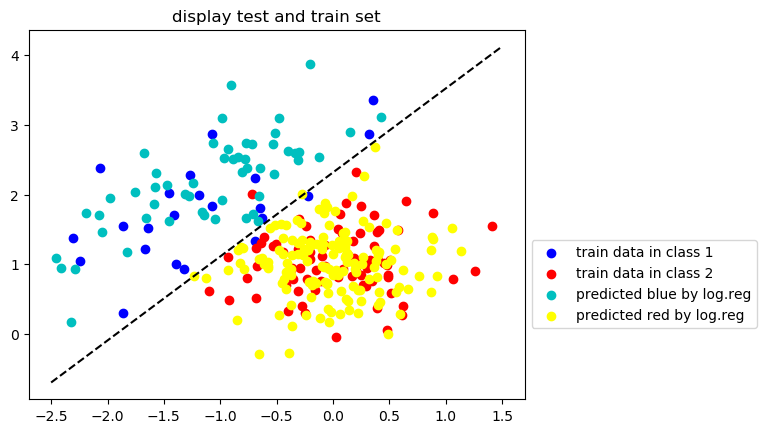

In [16]:
# First compute w... then: 
x1 = np.linspace(-2.5,1.5,10) 
x2 = (-w[0]-w[1]*x1)/w[2]

plt.title('display test and train set')
X_train_class1 =x_train[class_train_1]
X_train_class2 = x_train[class_train_2]

plt.scatter(X_train_class1[:,0],X_train_class1[:,1],color = 'b',label='train data in class 1')
plt.scatter(X_train_class2[:,0],X_train_class2[:,1],color = 'r',label='train data in class 2')

X_test_class1 =x_test[np.where(np.array([2-LDA(x) for x in x_test]) ==1)]
X_test_class2 = x_test[np.where(np.array([2-LDA(x) for x in x_test]) ==0)]

plt.scatter(X_test_class1[:,0],X_test_class1[:,1],color = 'c',label='predicted blue by log.reg')
plt.scatter(X_test_class2[:,0],X_test_class2[:,1],color = 'yellow',label = 'predicted red by log.reg')
plt.legend( bbox_to_anchor=(1, .45))
plt.plot(x1,x2,'k--')


In [17]:
#compute error on test set
err = np.mean(np.abs(np.array([2-LDA(x) for x in x_test]) - t_test))
print("error on test set : " + str(err*100) + " %")

error on test set : 5.5 %


Let's see what happend when we use the noised dataset

In [18]:
X1 = synth_train_err_meas[np.where(synth_train_err_meas[:,0]==1.)][:,1:3]
X2 = synth_train_err_meas[np.where(synth_train_err_meas[:,0]==2.)][:,1:3]

pi_1 = len(X1)/len(synth_train_err_meas)
pi_2 = len(X2)/len(synth_train_err_meas)

mu_1 = np.array([np.mean(X1[:,0]),np.mean(X1[:,1])])
mu_2 = np.array([np.mean(X2[:,0]),np.mean(X2[:,1])])

sigma_1 = np.cov(X1.T)
sigma_2 = np.cov(X2.T)

sigma = (sigma_1 + sigma_2)/2

logpi_1 = np.log(pi_1)
logpi_2 = np.log(pi_2)

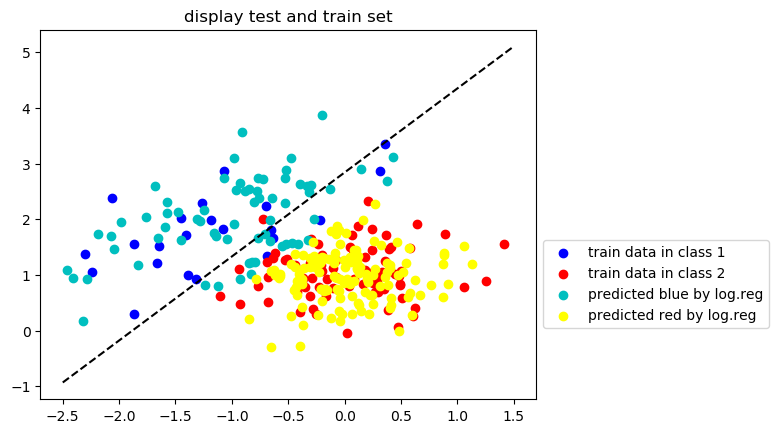

In [19]:
x1 = np.linspace(-2.5,1.5,10) 
x2 = (-w_err_meas[0]-w_err_meas[1]*x1)/w_err_meas[2]

plt.title('display test and train set')
X_train_class1 =x_train[class_train_1]
X_train_class2 = x_train[class_train_2]

plt.scatter(X_train_class1[:,0],X_train_class1[:,1],color = 'b',label='train data in class 1')
plt.scatter(X_train_class2[:,0],X_train_class2[:,1],color = 'r',label='train data in class 2')

X_test_class1 =x_test[np.where(np.array([LDA(x) for x in x_test]) ==1)]
X_test_class2 = x_test[np.where(np.array([LDA(x) for x in x_test]) ==2)]

plt.scatter(X_test_class1[:,0],X_test_class1[:,1],color = 'c',label='predicted blue by log.reg')
plt.scatter(X_test_class2[:,0],X_test_class2[:,1],color = 'yellow',label = 'predicted red by log.reg')
plt.legend( bbox_to_anchor=(1, .45))
plt.plot(x1,x2,'k--')


In [20]:
#compute error on test set
err = np.mean(np.abs(np.array([2-LDA(x) for x in x_test]) - t_test))
print("error on test set : " + str(err*100) + " %")

error on test set : 7.5 %


## 2. Application: handwritten digits recognition 5 & 6
We load 2 matrices which contain each a sequence of examples of 16x16 images 
of handwritten digits which are 5 and 6 here. Each line of the matrix
contains 256 pixel values coding for the gray level of a 16x16 image.

In [21]:
train_5 = np.loadtxt('train_5.txt',delimiter=',')   # 556 samples
train_6 = np.loadtxt('train_6.txt',delimiter=',')   # 664 samples

### Examples of images


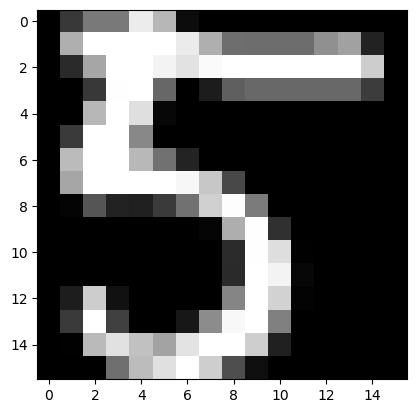

In [22]:
# Digit 5
n=9;
I = np.reshape(train_5[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

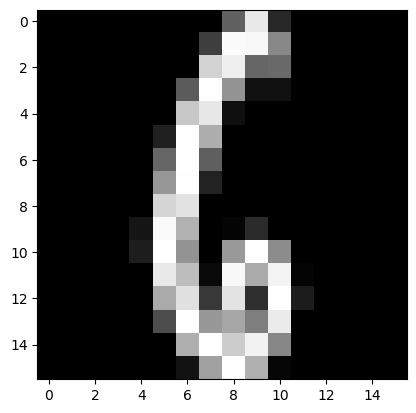

In [23]:
# Digit 6
n=5;
I = reshape(train_6[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

### Separating the training and test sets

We keep in the training set the 145 first images of 5s and the 200 first
images of 6s:


In [24]:
x_train_brut = np.vstack((train_5[:145,:], train_6[:200,:]))
N_train = np.size(x_train_brut,axis=0)
class_train = np.ones((N_train,1))   # label 1 for digit 6
class_train[:145] = 0       # label 0 for digit 5

x_test_brut = np.vstack((train_5[145:,:], train_6[200:,:]))
N_test = np.size(train_5,axis=0)+np.size(train_6,axis=0)-N_train
class_test = np.zeros((N_test,1))   # label 0 for digit 5
class_test[200:] = 1      # label 1 for digit 6

## Exercise 2: logistic regression to classify 5 & 6

1. Note that pixel values are between -1 and 1 by using the functions
 `min(I(:))` and `max(I(:))`.
2. Identify the indices of the most significant pixels, which are defined 
as having a standard deviation greater than 0.5 here. We denote by `lis_sig`
the list of positions of these significant pixels in the image vector.
_Indication : the function `std` gives the standard deviation (columnwise
in matrices) and you should find 173 pixel positions.
3. Show a binary image to locate these pixels.
_Indication : `Isig = zeros(16); Isig(list_sig)=1; Isig=Isig';`._
4. Define the training set `x_train` from `x_train_brut` from the significant pixels only.
5. Do the same with `x_test_brut` to extract `x_test`.
6. Use `regression_logistique.m` to estimate the logistic regression vector
`w` from the training set `x_train`. 
Choose `Nitermax = 13; eps_conv = 1e-3;`
7. Compute the decision function and the labels of the test set `x_test`. 
_Indication : do not forget the column of ones !_
8. Estimate the classification error rate by using :
`erreur = sum(abs(class-class_test))/N_test;`.
9. Locate some misclassified examples and visualize the corresponding image.
Comment on your results and observations.


In [25]:
# Exercise 2

print(np.min(I[:]))
print(np.max(I[:]))

-1.0
1.0


In [26]:
lis_sig = np.where(np.std(x_train_brut, axis=0)>0.5)[0]

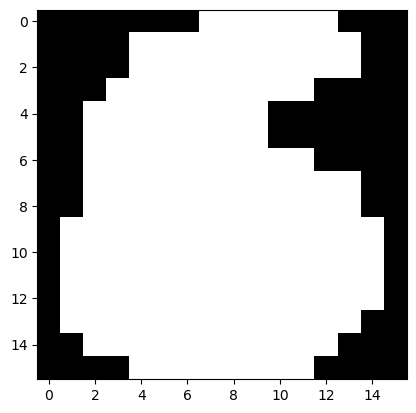

In [27]:
I_sig = zeros(256)
I_sig[lis_sig] = 1
I_sig = np.reshape(I_sig,(16,16))
plt.imshow(I_sig,cmap='gray')
plt.show()

Comme on pouvait l'anticiper, les pixels proches des bords latéraux de l'image ne sont pas très importants car ils ne contiennent que très rarement un pixel appartenant à l'écriture du chiffre qu'on étudie. Dans la suite, on supprime ces pixels de notre étude, car on les juge non significatifs et donc inutiles à notre étude : ils ne feraient probablement qu'augmenter le temps de calcul.

In [28]:
x_train = x_train_brut[:,lis_sig]
x_test = x_test_brut[:,lis_sig]
X_train = np.hstack((np.ones((N_train,1)),x_train))
X_test = np.hstack((np.ones((N_test,1)),x_test))

In [29]:
w, Niter = regression_logistique(X_train, class_train[:,0], Nitermax=13, eps_conv=1e-3)
y = sigmoid(X_test@w)
f_x = np.round(y)

In [30]:
error = np.sum(np.abs(f_x-class_test[:,0]))/N_test
error

0.2537142857142857

On obtient une erreur de l'ordre de 25%, ce qui est assez important mais satisfaisant étant donné la dimension importante de ce problème de classification d'image.

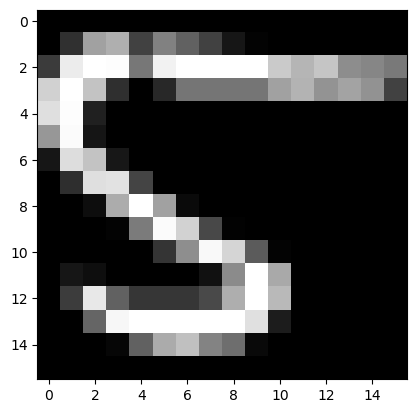

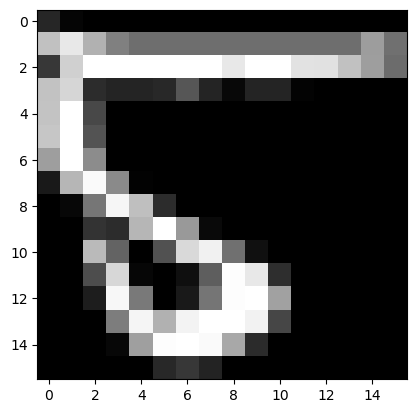

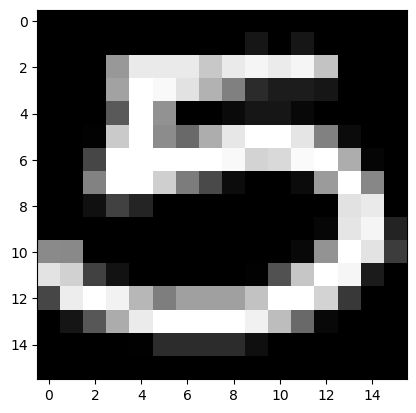

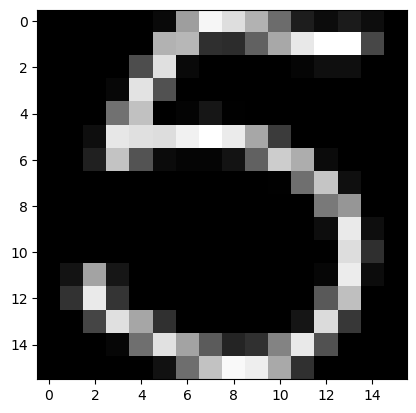

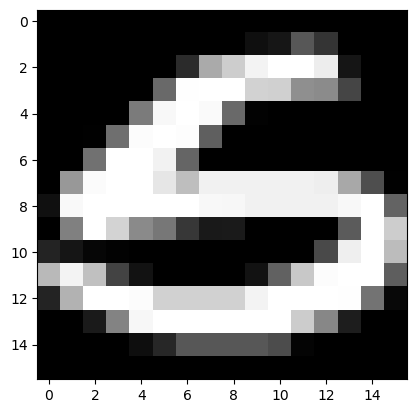

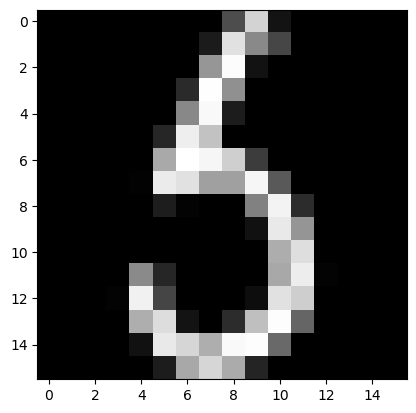

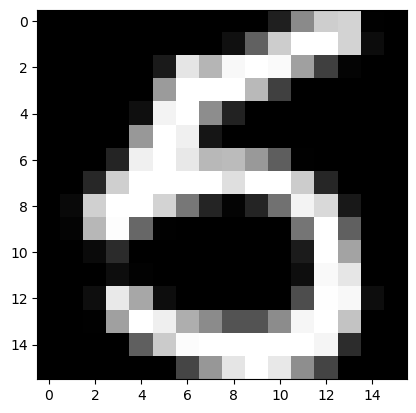

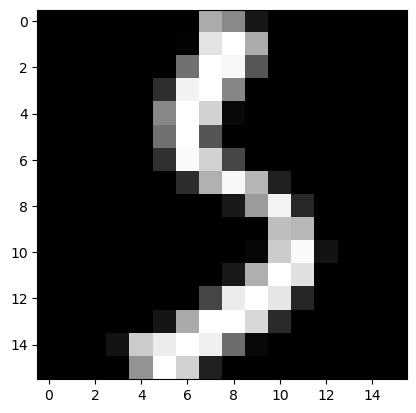

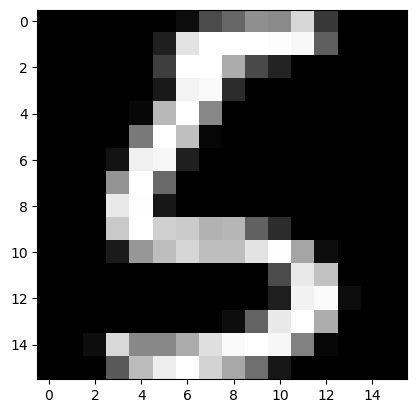

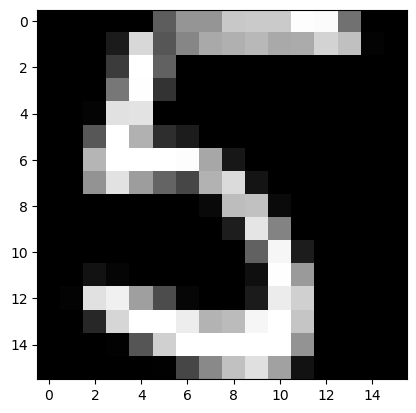

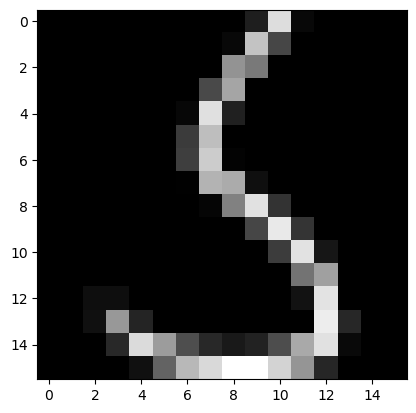

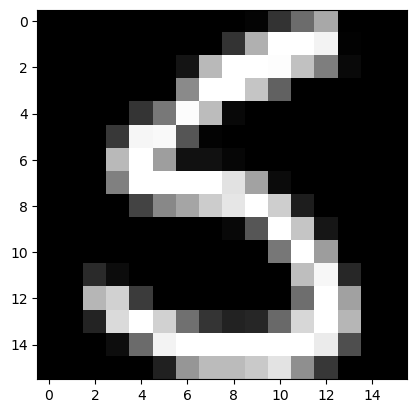

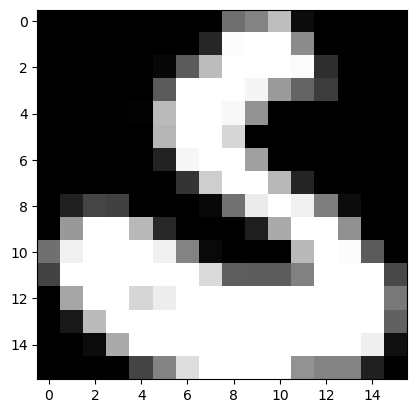

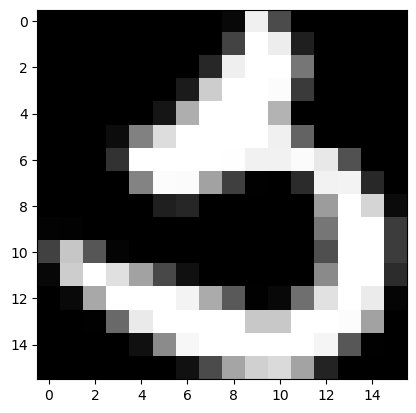

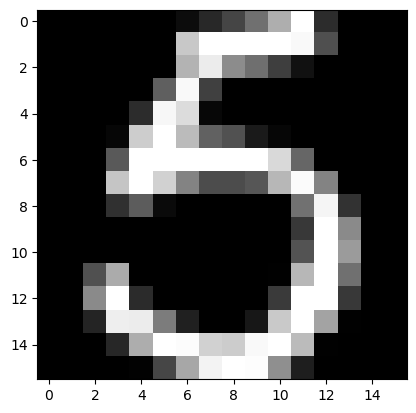

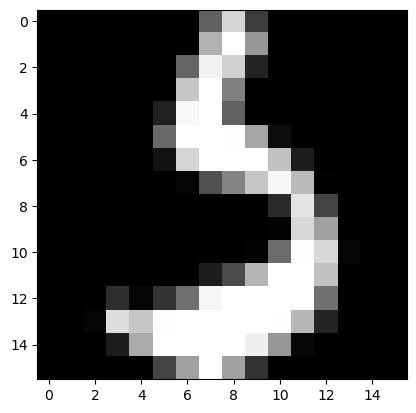

In [31]:
faux_6 = np.where(f_x-class_test[:,0]==1)[0]
faux_5 = np.where(f_x-class_test[:,0]==-1)[0]

for i in range (len(faux_6)) :
    I = reshape(x_test_brut[faux_6[i],:],(16,16))
    plt.imshow(I,cmap='gray')
    plt.show()

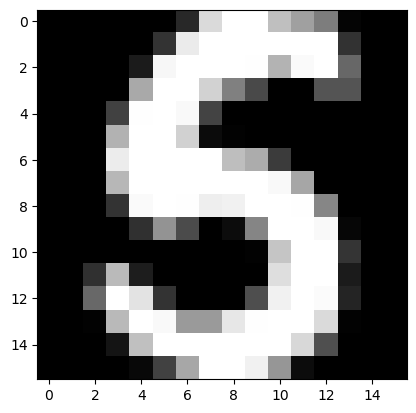

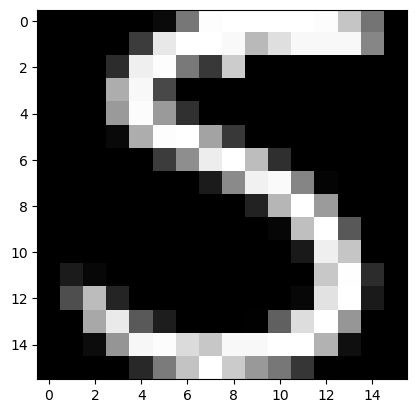

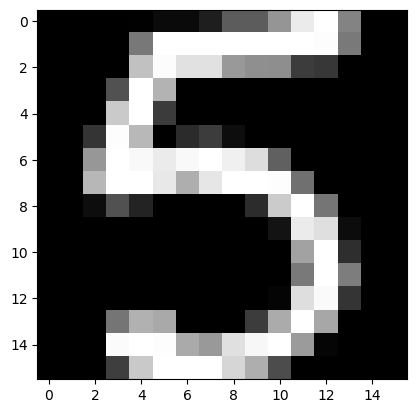

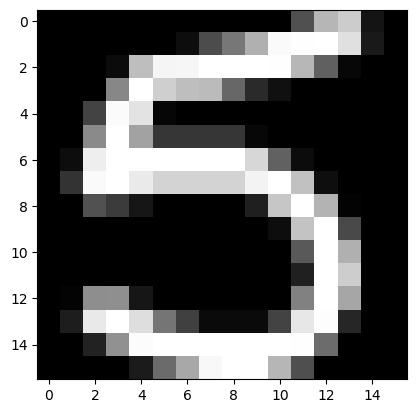

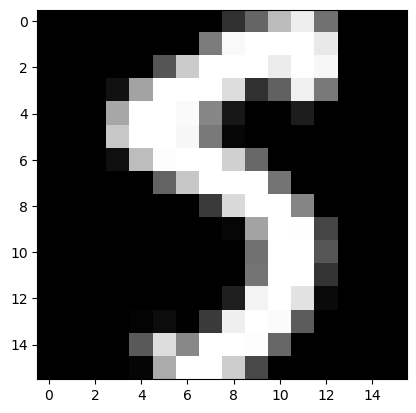

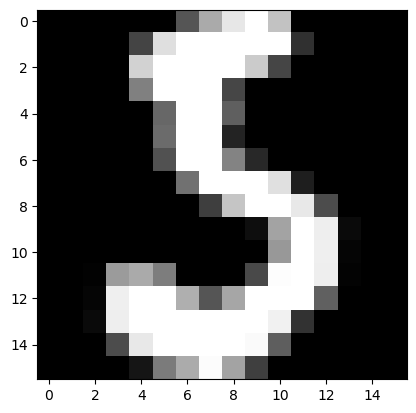

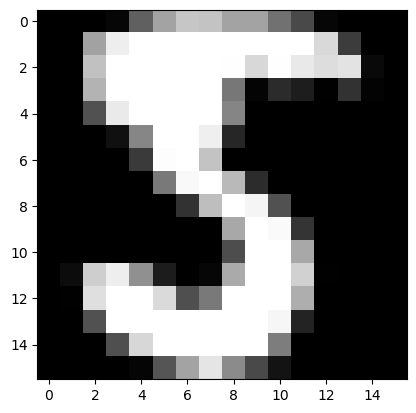

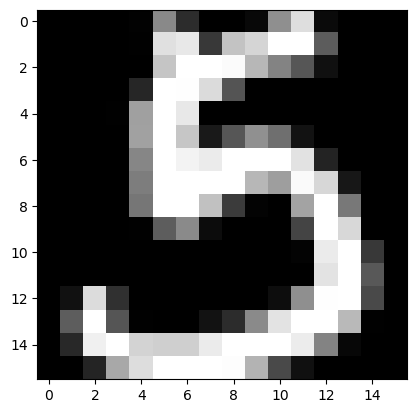

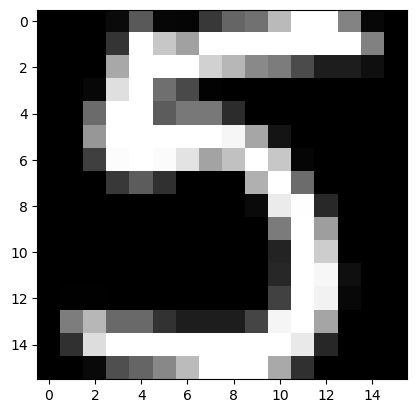

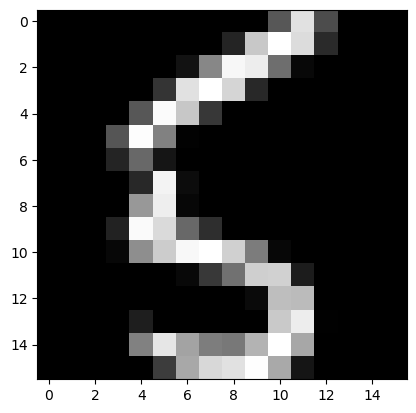

In [32]:
for i in range (10) :
    I = reshape(x_test_brut[faux_5[i],:],(16,16))
    plt.imshow(I,cmap='gray')
    plt.show()

Pour défendre notre algorithme, on peut vérifier que plusieurs des chiffres qu'il a pris pour des 5 étaient en réalité des 6 assez similaires à des 5 en image. Certains de ces chiffres auraient même peut-être pu tromper un être humain.
Il a tout de même tendance à se tromper assez fortement en prédisant beaucoup de 6 qui sont en réalité des 5. On peut tout de même noter que ces deux chiffres sont assez similaires au niveau de leur calligraphie et qu'il est donc probable que notre algorithme de régression logistique obtiendrait de meilleurs résultats dans le cas où on souhaiterait discriminer des 1 et des 5, par exemple.

## 3. Logistic regression using `scikit-learn`

1. **Go to** http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html for a presentation of the logistic regression model in `scikit-learn`.

2. **Apply** it to the present data set.

3. **Comment** on the use of logistic regression.

*Indication : you may have a look at* 

a) Theory : http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=MachineLearning&doc=exercises/ex5/ex5.html

b) Video :  https://www.coursera.org/learn/machine-learning/lecture/4BHEy/regularized-logistic-regression 

c) Example : http://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html#sphx-glr-auto-examples-exercises-plot-digits-classification-exercise-py

*for a short presentation of regularized logistic regression.*

In [33]:
# Include your code here
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
log_reg = lr.fit(x_train, class_train[:,0])
preds = lr.predict(x_test)
error_sklearn = 1-log_reg.score(x_test, class_test[:,0])


C:\Users\pierr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
error_sklearn-error

-0.008000000000000063

In [35]:
np.unique(f_x-preds, return_counts=True)

(array([-1.,  0.,  1.]), array([ 24, 812,  39]))

Commentaires : Les résultats obtenus par les deux méthodes sont très similaires. L'erreur obtenue par sklearn est meilleure, mais seulement à la troisième décimale, ce qui ne peut pas être considéré comme significatif du seul point de vue de notre étude. Les prédictions diffèrent cependant légèrement plus : 24 fois nous prédisons un 5 alors que sklearn prédit un 6, et 39 fois nous prédisons un 6 alors que sklearn prédit un 5. Comme le montre la différence entre les deux erreurs obtenues finalement, ces légères différences sont quasiment sans importance, mais elles peuvent être mises en évidence. 